Saving Mall_Customers.csv to Mall_Customers.csv


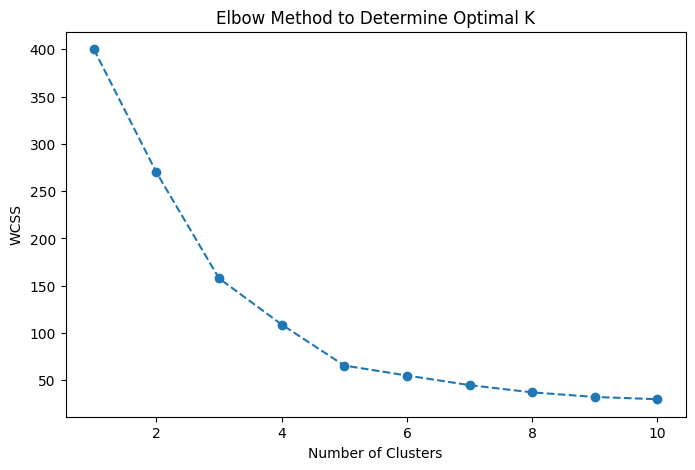

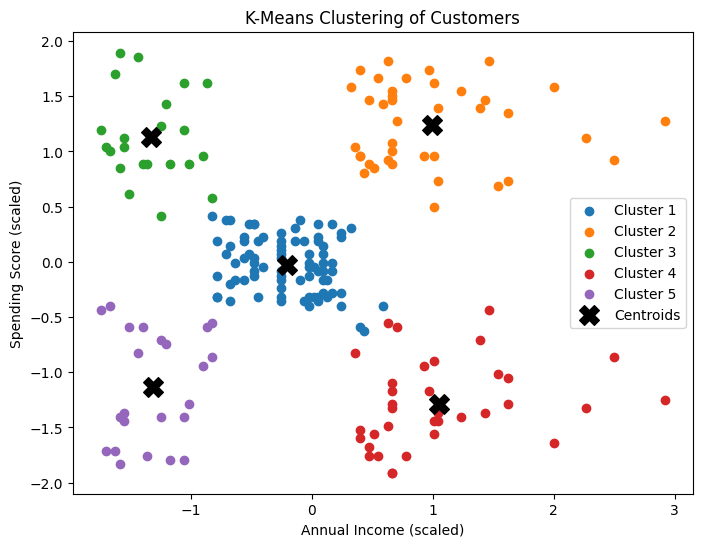

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

uploaded = files.upload()
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Select relevant features (Annual Income & Spending Score)
X = df.iloc[:, [3, 4]].values  # Using Annual Income and Spending Score

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

# Apply K-Means with optimal K (assume K=5 from elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('K-Means Clustering of Customers')
plt.legend()
plt.show()

# Analyzing clusters
df['Cluster'] = y_kmeans
cluster_summary = df.groupby('Cluster')[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')